**Gender Detection Using CNN and Tensorflow 2.x**

# Problem Statement

UTKFace Dataset is a large-scale face dataset withalong age span (range from 0 to 116 years old). The objective is to classify each face based  on  gender  using  CNNs  on  Tensorflow  2.x  and  then,  use OpenCV & Haar Cascade File to check the gender in real-time.

**Dataset Description:** UTKFace Dataset

Total Images: The Dataset consists of over 20,000 Face Images

The images cover large variationsin pose, facial expression, illumination, resolution, etc. This dataset could be used on a variety of tasks, e.g.,face detection, age estimation, gender detection, landmark localization, etc.You will be using the Aligned & Cropped Faces Dataset from the UTKFace Dataset



# Assignment Tasks

•Import Required Libraries

•Prepare the dataset for the model

•Develop CNN model for recognizing the gender

•Analyze the model summary

•Fit the basic CNN model

•Predict the Gender of the uploaded image

•Use OpenCV and Haar Cascade File to check the gender in Real-time


Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
from random import shuffle
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Dense, Activation, Flatten
from keras.utils.np_utils import to_categorical

# Preparing the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/Machine Learning/UTKFace_cropped_aligned.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: /content/utkface_aligned_cropped/crop_part1/34_1_2_201701042014

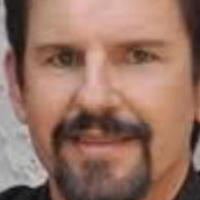

In [10]:
im = Image.open('/content/utkface_aligned_cropped/crop_part1/36_0_4_20170105170158252.jpg.chip.jpg')
im

In [8]:
os.chdir('/content/UTKFace')
onlyfiles = os.listdir()

In [9]:
len(onlyfiles)

23708

The file naming convention indicates Age and Gender at the start. The name of above image (36_0_4_20170105170158252) indicates Age:36 and Male:0.

Let's split the data into Gender classes 0-Male; 1-Female

In [11]:
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]

In [12]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)

Converting the images to Vectors

In [14]:
import imageio
X_data = []
for file in onlyfiles:
    face = imageio.imread(file)
    face = cv2.resize(face, (32, 32))
    X_data.append(face)

In [17]:
X_data[0]

array([[[136, 124, 116],
        [137, 124, 121],
        [ 57,  44,  42],
        ...,
        [214, 202, 169],
        [208, 192, 149],
        [198, 179, 134]],

       [[143, 129, 120],
        [121, 106, 100],
        [ 81,  66,  61],
        ...,
        [208, 189, 156],
        [212, 189, 145],
        [196, 171, 122]],

       [[ 89,  72,  62],
        [ 73,  56,  48],
        [ 63,  45,  38],
        ...,
        [205, 181, 147],
        [206, 179, 134],
        [196, 166, 113]],

       ...,

       [[103,  67,  41],
        [ 93,  58,  28],
        [113,  78,  46],
        ...,
        [ 16,  16,  14],
        [ 41,  41,  39],
        [ 44,  44,  44]],

       [[139,  99,  71],
        [101,  62,  31],
        [106,  67,  34],
        ...,
        [ 17,  17,  15],
        [ 49,  49,  47],
        [ 38,  38,  38]],

       [[189, 149, 120],
        [145, 104,  72],
        [103,  64,  29],
        ...,
        [ 12,  12,  10],
        [ 12,  12,  10],
        [ 32,  32,  32]]

In [18]:
X=np.squeeze(X_data)
X.shape

(23708, 32, 32, 3)

Normalizing the data

In [20]:
X = X.astype('float32')
X /= 255.
X[0]

array([[[0.53333336, 0.4862745 , 0.45490196],
        [0.5372549 , 0.4862745 , 0.4745098 ],
        [0.22352941, 0.17254902, 0.16470589],
        ...,
        [0.8392157 , 0.7921569 , 0.6627451 ],
        [0.8156863 , 0.7529412 , 0.58431375],
        [0.7764706 , 0.7019608 , 0.5254902 ]],

       [[0.56078434, 0.5058824 , 0.47058824],
        [0.4745098 , 0.41568628, 0.39215687],
        [0.31764707, 0.25882354, 0.23921569],
        ...,
        [0.8156863 , 0.7411765 , 0.6117647 ],
        [0.83137256, 0.7411765 , 0.5686275 ],
        [0.76862746, 0.67058825, 0.47843137]],

       [[0.34901962, 0.28235295, 0.24313726],
        [0.28627452, 0.21960784, 0.1882353 ],
        [0.24705882, 0.1764706 , 0.14901961],
        ...,
        [0.8039216 , 0.70980394, 0.5764706 ],
        [0.80784315, 0.7019608 , 0.5254902 ],
        [0.76862746, 0.6509804 , 0.44313726]],

       ...,

       [[0.40392157, 0.2627451 , 0.16078432],
        [0.3647059 , 0.22745098, 0.10980392],
        [0.44313726, 0

Converting the classes to categorical

In [21]:
classes[:10]

[0, 0, 1, 0, 1, 0, 0, 0, 1, 1]

In [22]:
categorical_labels = to_categorical(classes, num_classes=2)
categorical_labels[:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Splitting the Training and Test data

In [23]:
(x_train, y_train), (x_test, y_test) = (X[:15008], categorical_labels[:15008]), (X[15008:], categorical_labels[15008:])
(x_val, y_val) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])

len(x_train)+len(x_test)+len(x_val) == len(X)

True

# Building the CNN Model

In [24]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [25]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, 
          batch_size=64, epochs=25, 
          validation_data=(x_val, y_val))

Epoch 1/25
235/235 [==============================] - 9s 13ms/step - loss: 0.6314 - accuracy: 0.6468 - val_loss: 0.4323 - val_accuracy: 0.8137
Epoch 2/25
235/235 [==============================] - 3s 11ms/step - loss: 0.4379 - accuracy: 0.8067 - val_loss: 0.3522 - val_accuracy: 0.8439
Epoch 3/25
235/235 [==============================] - 3s 11ms/step - loss: 0.3740 - accuracy: 0.8344 - val_loss: 0.3384 - val_accuracy: 0.8534
Epoch 4/25
235/235 [==============================] - 3s 11ms/step - loss: 0.3599 - accuracy: 0.8407 - val_loss: 0.3101 - val_accuracy: 0.8636
Epoch 5/25
235/235 [==============================] - 3s 11ms/step - loss: 0.3479 - accuracy: 0.8460 - val_loss: 0.3016 - val_accuracy: 0.8651
Epoch 6/25
235/235 [==============================] - 3s 11ms/step - loss: 0.3327 - accuracy: 0.8517 - val_loss: 0.2969 - val_accuracy: 0.8720
Epoch 7/25
235/235 [==============================] - 3s 12ms/step - loss: 0.3205 - accuracy: 0.8518 - val_loss: 0.2843 - val_accuracy: 0.8744

Evaluating the Model

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy:', score[1])

Test Accuracy: 0.8905882239341736


In [28]:
labels = ['Male', 'Female']
y_pred = model.predict(x_test)

Plotting a random sample of test images and their predicted labels

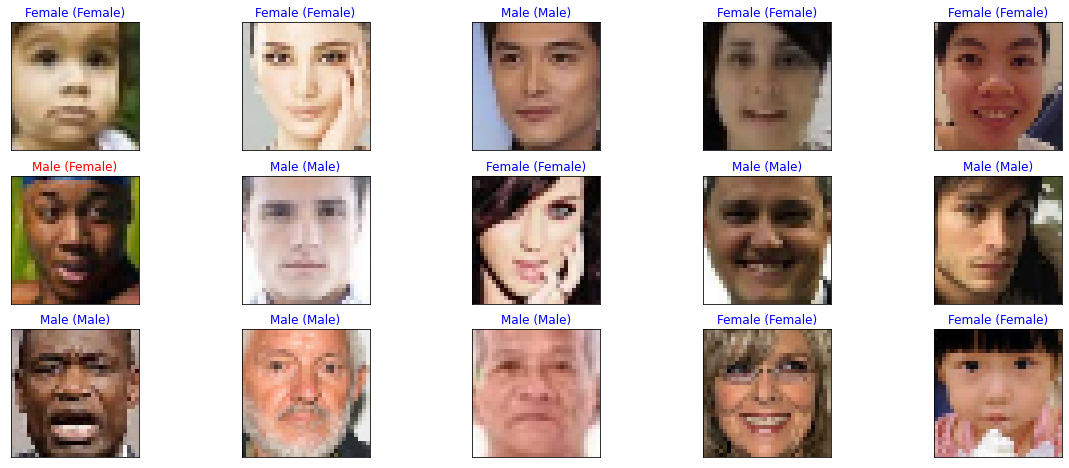

In [29]:
figure = plt.figure(figsize=(20,8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    ax.set_title('{} ({})'.format(labels[predict_index], 
                                  labels[true_index]), 
                 color=("blue" if predict_index==true_index else "red"))
plt.show()

# Predicting the Gender of uploaded image

In [72]:
def predict_img(model, img):
    x = imageio.imread(img)
    x = cv2.resize(x, (32, 32))
    x = np.squeeze(x)
    x = x.reshape(1, 32, 32, 3)
    #x = np.expand_dims(x, axis=0)
    x = x.astype('float32')
    x = x/255.
    result = model.predict(x)
    print(result[0])

    plt.gray()
    plt.imshow(np.squeeze(x))
    plt.xticks([])
    plt.yticks([])
    plt.show()

    index = np.array(result[0]).argmax()
    classes = ['Male', 'Female']
    
    print('Gender Predicted:', classes[index])
    return result[0]

[0.20132072 0.80790627]


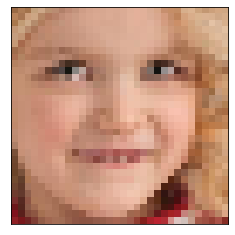

Gender Predicted: Female


array([0.20132072, 0.80790627], dtype=float32)

In [73]:
predict_img(model, '/content/utkface_aligned_cropped/crop_part1/3_1_0_20170109192803099.jpg.chip.jpg')

# Checking the Gender in real time with OpenCV and Haar Cascade file

In [ ]:
import cv2
import math
import argparse
from keras.models import model_from_json
from keras.preprocessing import image

In [ ]:
faceNet=cv2.dnn.readNet("models\opencv_face_detector_uint8.pb", "models\opencv_face_detector.pbtxt") 
genderNet=cv2.dnn.readNet("models\gender_net.caffemodel", "models\gender_deploy.prototxt")
emotionNet = model_from_json(open("model/fer.json", "r").read())
emotionNet.load_weights('model/model_filter.h5')

In [ ]:
def detectFaces(net, frame, conf_threshold=0.7):
    frame1=frame.copy()
    frameHeight=frame1.shape[0]
    frameWidth=frame1.shape[1]
    blob=cv2.dnn.blobFromImage(frame1, 1.0, (300, 300), [104, 117, 123], True, False) 

    # set the input to the pre-trained deep learning network and obtain the output predicted probabilities 
    net.setInput(blob) #Passing the blob through the network 
    detections=net.forward() #Grabbing the Detections/Predictions
    faceBoxes=[]

    # Filter out weak detections by ensuring the confidence is greater than the minimum confidence
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)

            faceBoxes.append([x1,y1,x2,y2]) #Bounding Box Co-ordinates

            cv2.rectangle(frame1, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frame1,faceBoxes

In [ ]:
MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746) #Initializing the Mean Values for the Model
genderList=['Male','Female']

In [ ]:
def detectGender(net, frame, faceBoxes):
    for faceBox in faceBoxes:
        face=frame[max(0,faceBox[1]-padding):
                   min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                   :min(faceBox[2]+padding, frame.shape[1]-1)]

        blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=True) 

        net.setInput(blob) #Passing the blob through the Neural Net
        genderPreds=net.forward() #Grabbing the Detections/Predictions
        gender=genderList[genderPreds[0].argmax()] #Displaying the Top Prediction
        #The function putText renders the specified text string in the image.
        cv2.putText(frame, f'{gender}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
    
    return frame

In [ ]:
def detectEmotionGenderAge(emotionNet, genderNet, ageNet, frame, faceBoxes):
    for faceBox in faceBoxes:
        face=frame[max(0,faceBox[1]-padding):
                   min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                   :min(faceBox[2]+padding, frame.shape[1]-1)]

        #blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=True) 
        face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        emotionPreds = net.predict(face_gray)
        #net.setInput(blob) #Passing the blob through the Neural Net
        #genderPreds=net.forward() #Grabbing the Detections/Predictions
        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        emotion=emotions[emotionPreds[0].argmax()] #Displaying the Top Prediction
        #The function putText renders the specified text string in the image.
        cv2.putText(frame, f'{emotion}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
    
    return frame

In [ ]:
# video=cv2.VideoCapture(args.image if args.image else 0)
cap=cv2.VideoCapture(img)
padding=20

# while cv2.waitKey(1)<0:
while True:
    hasFrame,frame=cap.read()
    if not hasFrame:
        cv2.waitKey()
        break

    resultImg,faceBoxes=detectFaces(faceNet,frame)
    if not faceBoxes:
        print('No faces found....')

    resultImg = detectGender(genderNet, resultImg, faceBoxes)
    cv2.imshow("Gender Detection", resultImg) #Display the Image in an OpenCV Window

    if cv2.waitKey(1) == ord('q'):
    #if key >= 0:
        break

cap.release()
cv2.destroyAllWindows()